In [1]:
%load_ext uhed

In [2]:
%slice SyedAhmed

In [3]:
%site vts-gpo

In [4]:
%lab

<IPython.core.display.Javascript object>

In [5]:
manifest = SITE.listresources(context, SLICE)

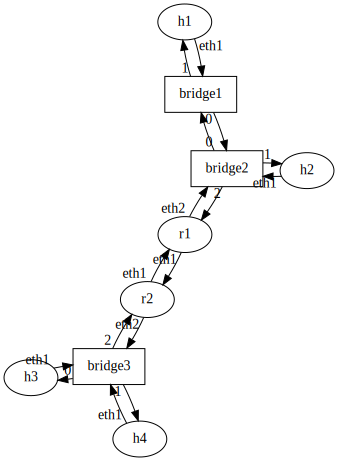

In [6]:
genish.showtopo(manifest,"neato")

In [7]:
SITE.getL2Table(context, SLICE, "bridge1")

Port,VLAN,MAC,Age
2,0,76:14:33:7c:c0:20,19
1,0,3e:e6:38:b8:83:67,19
1,0,82:59:af:d6:79:4f,9


In [8]:
SITE.getL2Table(context, SLICE, "bridge2")

Port,VLAN,MAC,Age
1,0,76:14:33:7c:c0:20,28
2,0,3e:e6:38:b8:83:67,27
3,0,82:59:af:d6:79:4f,7


In [9]:
SITE.getL2Table(context, SLICE, "bridge3")

Port,VLAN,MAC,Age
2,0,7e:53:7a:19:da:8e,31
1,0,5e:c3:fb:e6:26:cb,31
3,0,86:fe:87:53:24:79,0


At this point essentially what I did was I created the L2 tables and assigned them to the bridges present in the network. This shows that everything is working fine (MAC address).

In [10]:
SITE.IPv4Router.getRouteTable(context, SLICE, "r1")

,Selected,Network,Next Hop,Interface,Duration
O,False,10.10.123.0/24 [110/10],directly connected,eth2,00:35:25
C,True,10.10.123.0/24,directly connected,eth2,None
O,False,10.75.73.0/24 [110/10],directly connected,eth1,00:34:45
C,True,10.75.73.0/24,directly connected,eth1,None
C,True,127.0.0.0/8,directly connected,lo,None
O,True,192.168.90.0/24 [110/20],10.75.73.2,eth1,00:34:35


In [11]:
SITE.IPv4Router.getRouteTable(context, SLICE, "r2")

,Selected,Network,Next Hop,Interface,Duration
O,True,10.10.123.0/24 [110/20],10.75.73.1,eth1,00:34:43
O,False,10.75.73.0/24 [110/10],directly connected,eth1,00:35:33
C,True,10.75.73.0/24,directly connected,eth1,None
C,True,127.0.0.0/8,directly connected,lo,None
O,False,192.168.90.0/24 [110/10],directly connected,eth2,00:35:33
C,True,192.168.90.0/24,directly connected,eth2,None


In [13]:
SITE.Host.getRouteTable(context, SLICE, "h1")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,10.10.123.254,eth1
10.10.123.0,255.255.255.0,0.0.0.0,eth1


In [14]:
SITE.Host.getRouteTable(context, SLICE, "h2")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,10.10.123.254,eth1
10.10.123.0,255.255.255.0,0.0.0.0,eth1


In [15]:
SITE.Host.getRouteTable(context, SLICE, "h3")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,192.168.90.254,eth1
192.168.90.0,255.255.255.0,0.0.0.0,eth1


In [16]:
SITE.Host.getRouteTable(context, SLICE, "h4")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,192.168.90.254,eth1
192.168.90.0,255.255.255.0,0.0.0.0,eth1


In [17]:
SITE.Host.getRouteTable(context, SLICE, "r1")

Destination,Mask,Gateway,Interface
10.10.123.0,255.255.255.0,0.0.0.0,eth2
10.75.73.0,255.255.255.0,0.0.0.0,eth1
192.168.90.0,255.255.255.0,10.75.73.2,eth1


In [18]:
SITE.Host.getRouteTable(context, SLICE, "r2")

Destination,Mask,Gateway,Interface
10.10.123.0,255.255.255.0,10.75.73.1,eth1
10.75.73.0,255.255.255.0,0.0.0.0,eth1
192.168.90.0,255.255.255.0,0.0.0.0,eth2


In [22]:
import uhgeni.ssh
uhgeni.ssh.writeSliceConfig(SLICE, manifest)

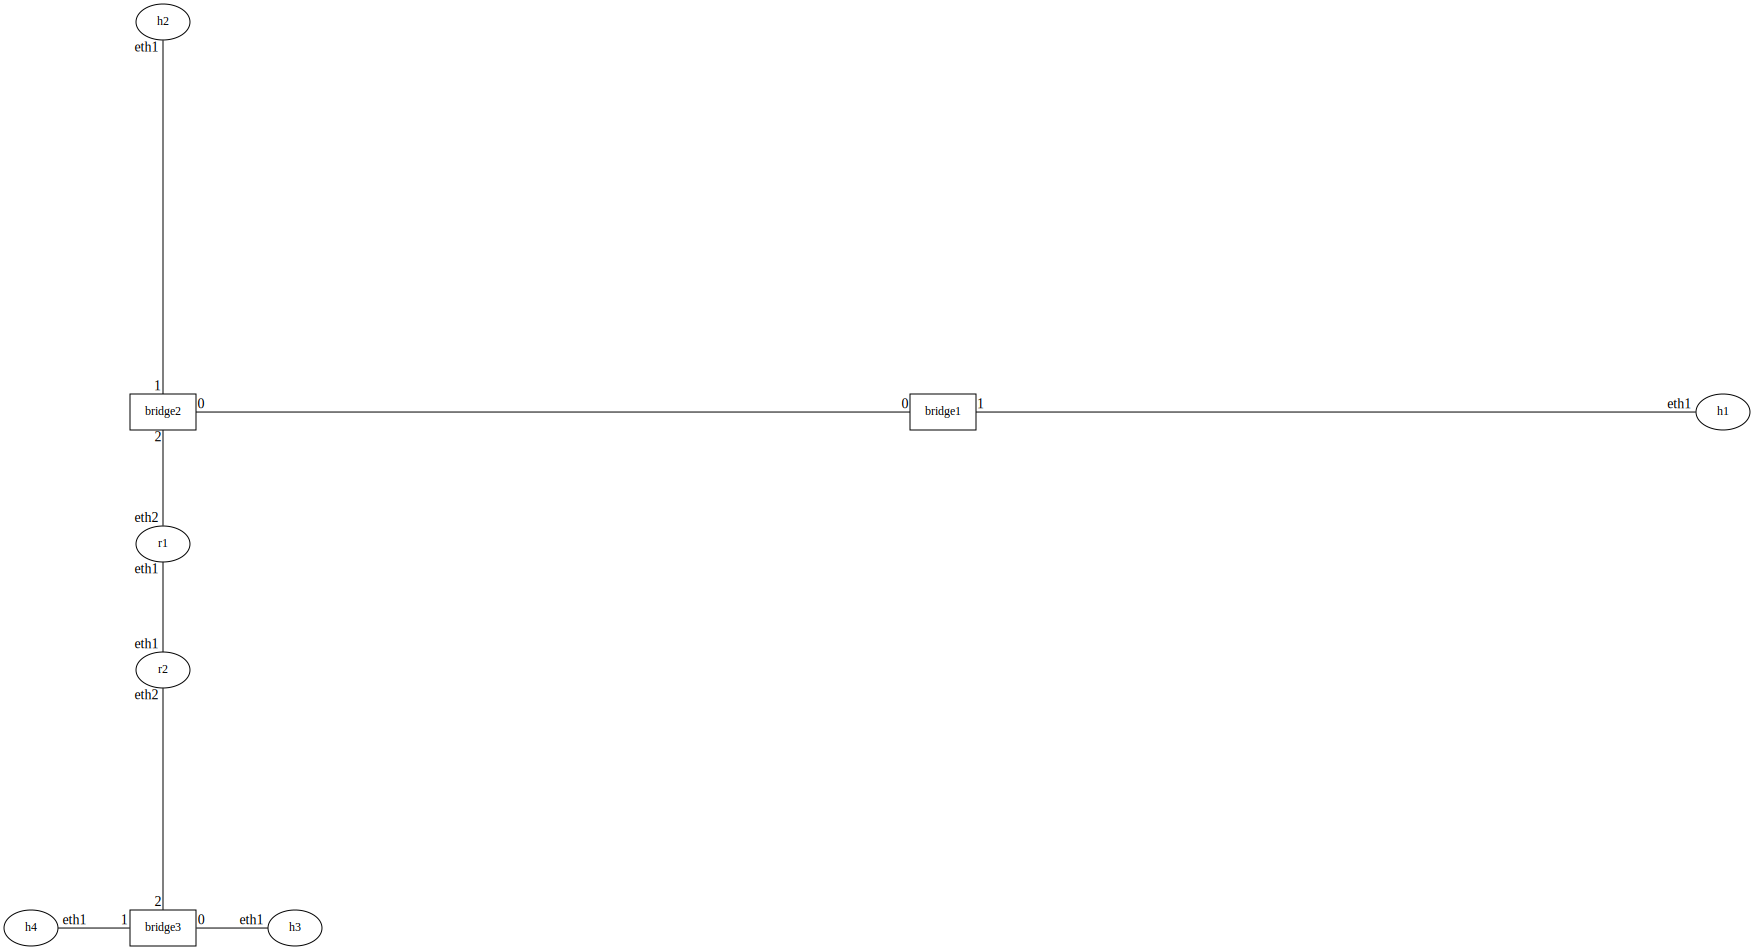

In [23]:
import uhgeni.graph.util
g = uhgeni.graph.util.buildFromManifest(manifest)
g.context = context
g.show()

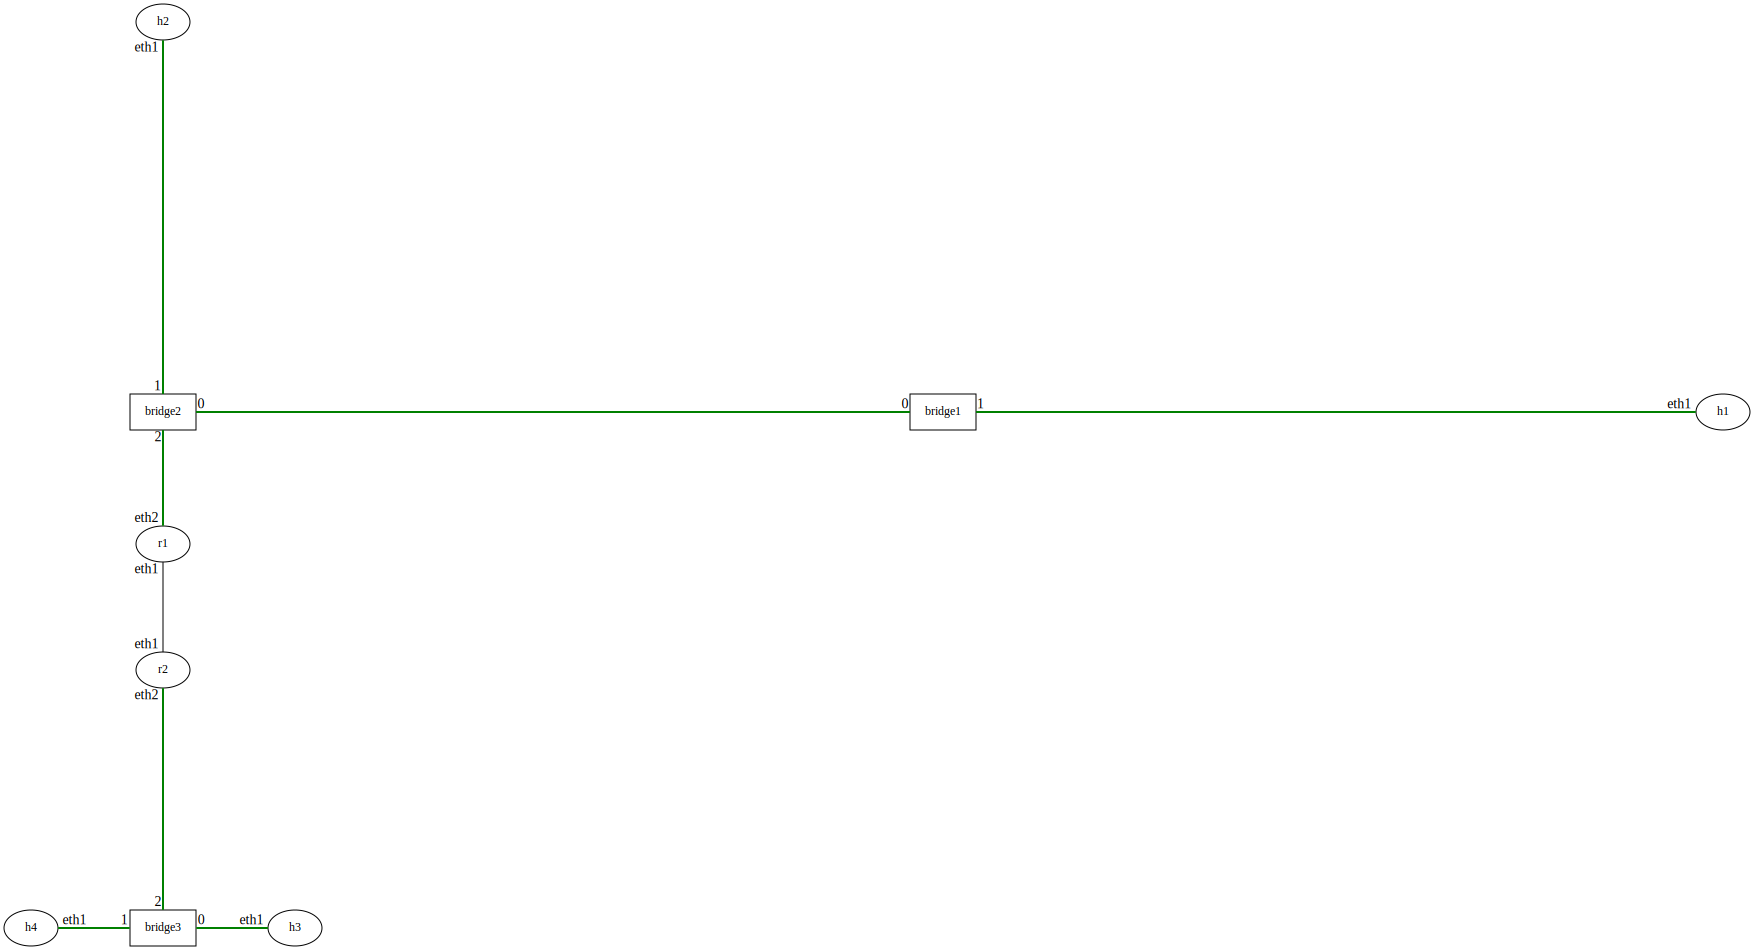

In [24]:
g.decorateSTPInfo()
g.show()



sazaidi5@cot-cn:~$ gssh SyedAhmed h1
/ # tcpdump -i eth1 -e not ether dst 01:80:c2:00:00:00 -c 5
tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on eth1, link-type EN10MB (Ethernet), capture size 262144 bytes
04:44:19.117720 82:59:af:d6:79:4f (oui Unknown) > 01:00:5e:00:00:05 (oui Unknown), ethertype IPv4 (0x0800), length 78: 10.10.123.254 > 224.0.0.5
: OSPFv2, Hello, length 44
04:44:19.118016 76:14:33:7c:c0:20 (oui Unknown) > 82:59:af:d6:79:4f (oui Unknown), ethertype IPv4 (0x0800), length 82: 10.10.123.1.38560 > 192.1
.242.132.53: 58678+ PTR? 5.0.0.224.in-addr.arpa. (40)
04:44:19.118491 82:59:af:d6:79:4f (oui Unknown) > 76:14:33:7c:c0:20 (oui Unknown), ethertype IPv4 (0x0800), length 110: 10.10.123.254 > 10.10.12
3.1: ICMP net 192.1.242.132 unreachable, length 76
04:44:21.620628 76:14:33:7c:c0:20 (oui Unknown) > 82:59:af:d6:79:4f (oui Unknown), ethertype IPv4 (0x0800), length 82: 10.10.123.1.38560 > 192.1
.242.132.53: 58678+ PTR? 5.0.0.224.in-addr.arpa. (40)
04:44:21.620691 82:59:af:d6:79:4f (oui Unknown) > 76:14:33:7c:c0:20 (oui Unknown), ethertype IPv4 (0x0800), length 110: 10.10.123.254 > 10.10.12
3.1: ICMP net 192.1.242.132 unreachable, length 76
5 packets captured
21 packets received by filter
13 packets dropped by kernel

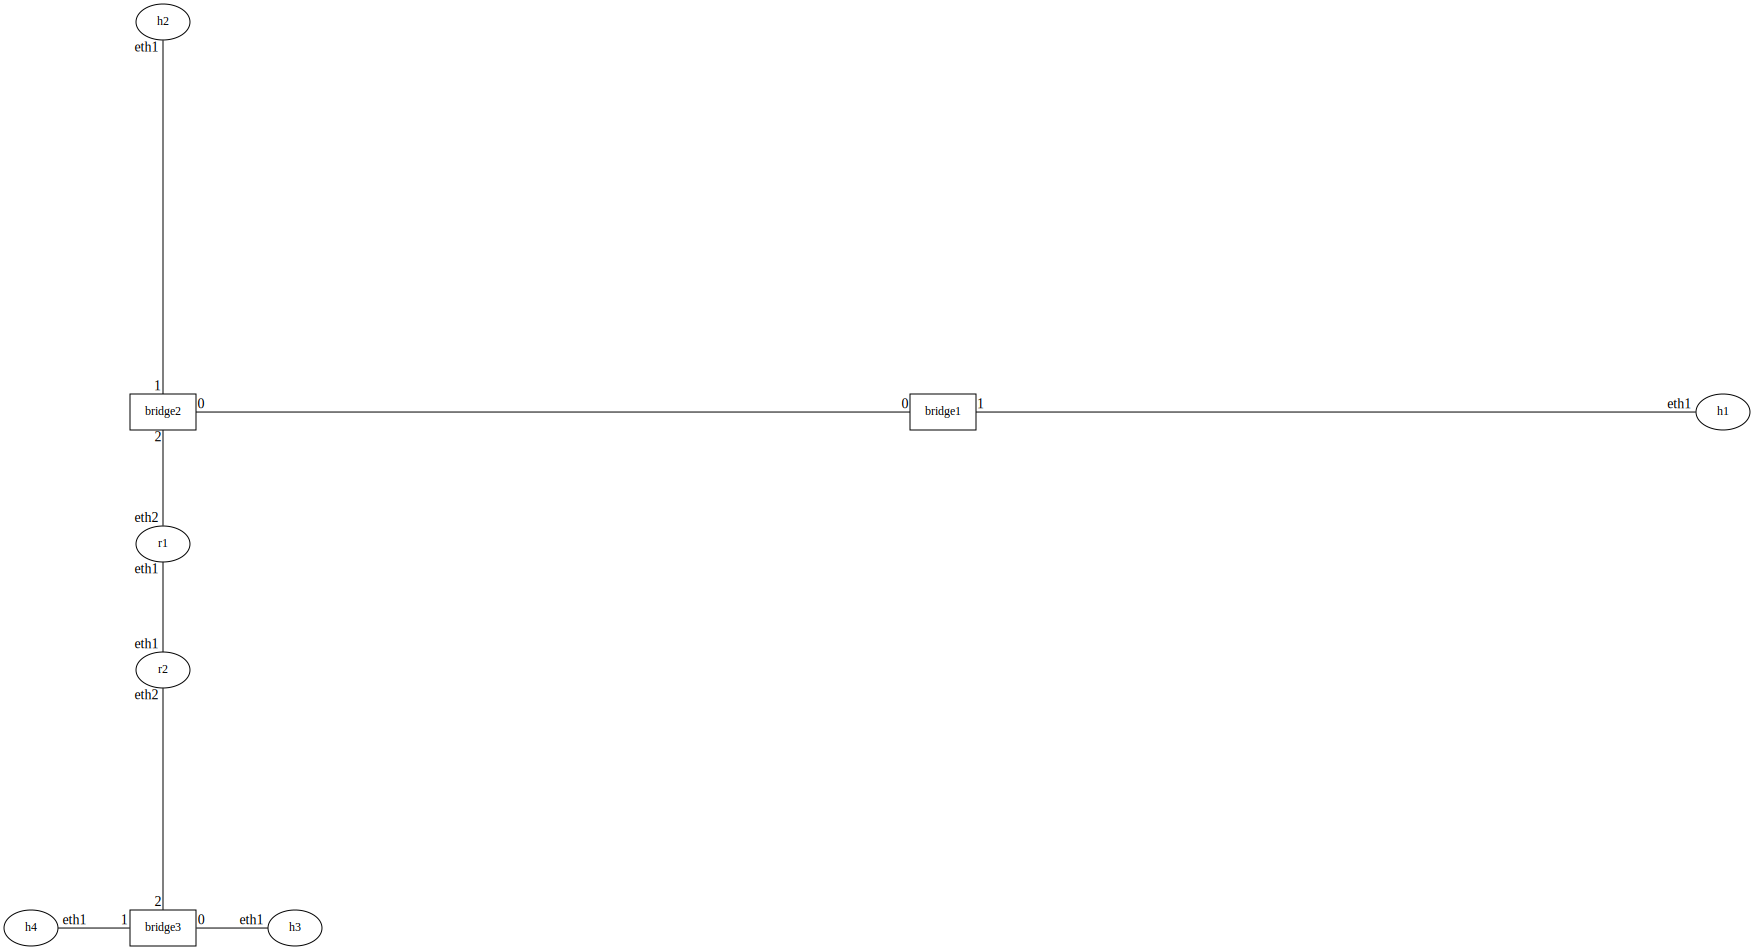

In [25]:
import uhgeni.graph.util

g = uhgeni.graph.util.buildFromManifest(manifest)
g.context = context

g.show()


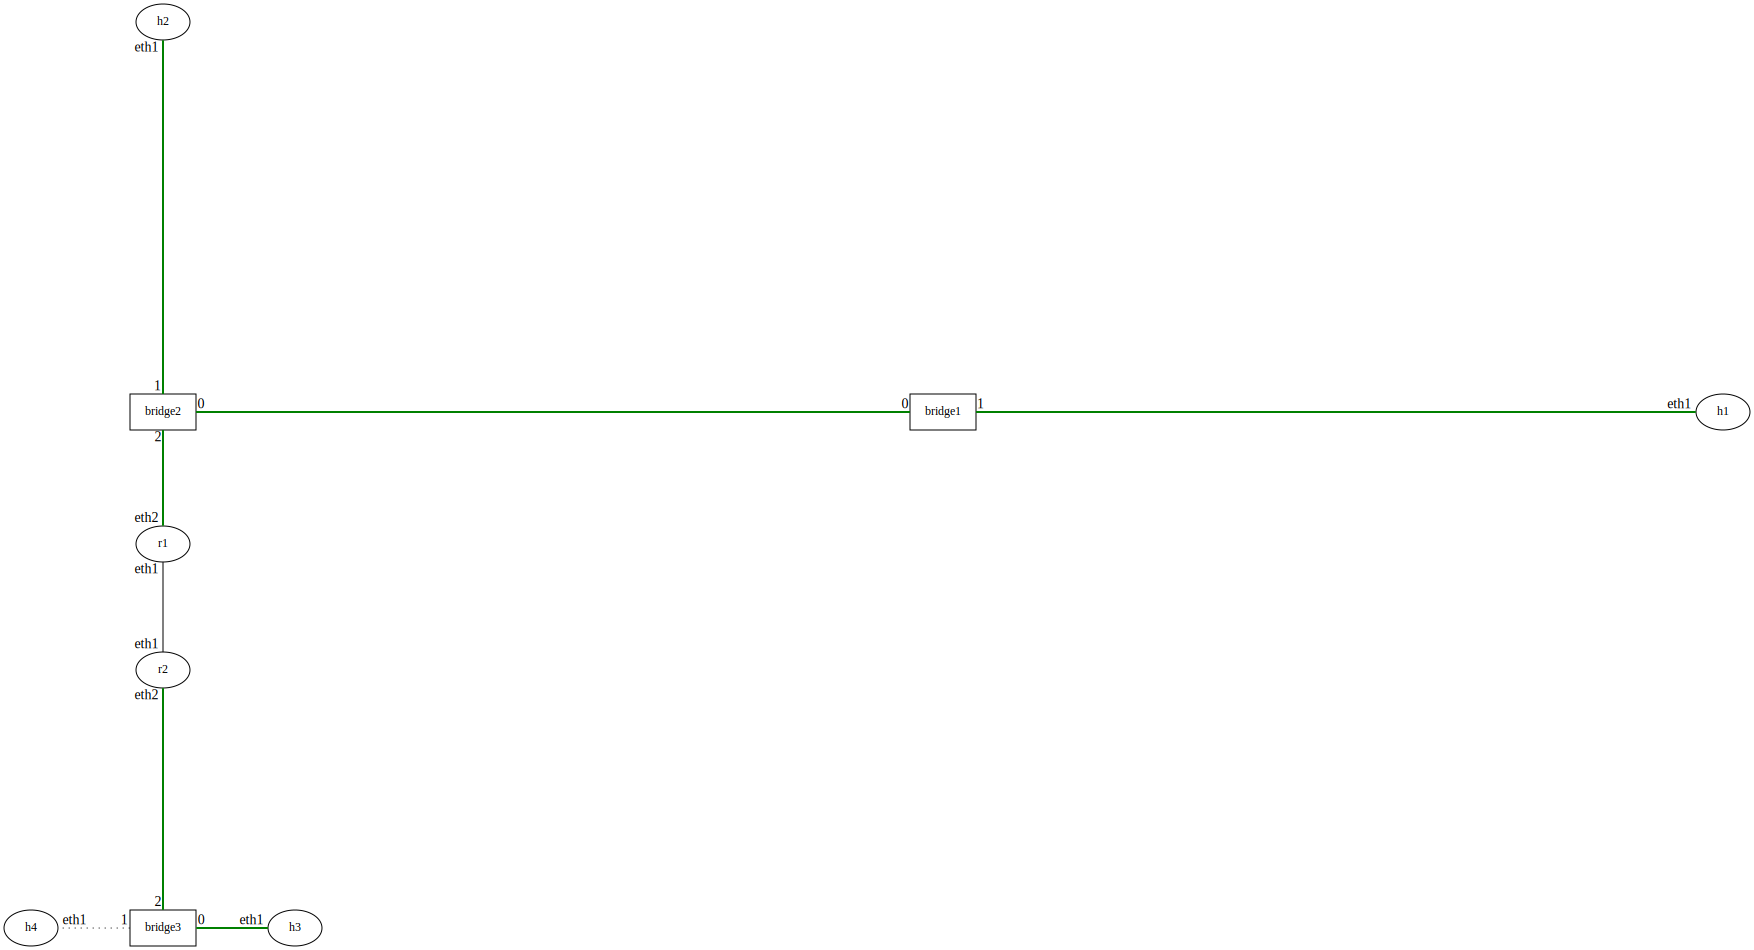

In [26]:
g["bridge3"][1].setDown()
g.decorateSTPInfo()
g.show()


In [27]:
SITE.getPortInfo(context, SLICE, "bridge1")


Client ID,ifindex,vlan,MTU,Admin State,Link State,RX Bytes (Pkts),TX Bytes (Pkts)
bridge1:0,7847,None,1500,up,up,167127 (2181),315804 (5462)
bridge1:1,7849,None,1500,up,up,102292 (1356),380074 (6277)


In [28]:
SITE.getPortInfo(context, SLICE, "bridge2")


Client ID,ifindex,vlan,MTU,Admin State,Link State,RX Bytes (Pkts),TX Bytes (Pkts)
bridge2:1,7851,None,1500,up,up,102106 (1353),379806 (6275)
bridge2:0,7848,None,1500,up,up,316722 (5476),167891 (2191)
bridge2:2,7857,None,1500,up,up,193146 (2441),341280 (5722)


In [29]:
SITE.getPortInfo(context, SLICE, "bridge3")


Client ID,ifindex,vlan,MTU,Admin State,Link State,RX Bytes (Pkts),TX Bytes (Pkts)
bridge3:2,7861,None,1500,up,up,189082 (2419),337948 (5696)
bridge3:0,7853,None,1500,up,up,101378 (1357),378884 (6283)
bridge3:1,7855,None,1500,down,down,90836 (1198),334766 (5528)


Mac & IP addresses I got using the IP Addr, route -n and arp -a commands. 

I then pinged host 2 and 4 from host1

sazaidi5@cot-cn:~$ gssh SyedAhmed h3
/ # ip addr
1: lo: <LOOPBACK,UP,LOWER_UP> mtu 65536 qdisc noqueue state UNKNOWN qlen 1
    link/loopback 00:00:00:00:00:00 brd 00:00:00:00:00:00
    inet 127.0.0.1/8 scope host lo
       valid_lft forever preferred_lft forever
    inet6 ::1/128 scope host
       valid_lft forever preferred_lft forever
7854: eth1@if7853: <BROADCAST,MULTICAST,UP,LOWER_UP,M-DOWN> mtu 1500 qdisc netem state UP qlen 1000
    link/ether 5e:c3:fb:e6:26:cb brd ff:ff:ff:ff:ff:ff
    inet 192.168.90.1/24 scope global eth1
       valid_lft forever preferred_lft forever
    inet6 fe80::5cc3:fbff:fee6:26cb/64 scope link
       valid_lft forever preferred_lft forever
/ #
/ # route -n
Kernel IP routing table
Destination     Gateway         Genmask         Flags Metric Ref    Use Iface
0.0.0.0         192.168.90.254  0.0.0.0         UG    0      0        0 eth1
192.168.90.0    0.0.0.0         255.255.255.0   U     0      0        0 eth1
/ #
/ #
/ # arp -a
? (192.168.90.254) at 86:fe:87:53:24:79 [ether] on eth1
/ #
/ #
/ # arp -a
? (192.168.90.254) at 86:fe:87:53:24:79 [ether] on eth1
/ #
/ #
/ # ping 10.10.123.2
PING 10.10.123.2 (10.10.123.2) 56(84) bytes of data.
64 bytes from 10.10.123.2: icmp_seq=1 ttl=62 time=0.536 ms
64 bytes from 10.10.123.2: icmp_seq=2 ttl=62 time=0.096 ms
64 bytes from 10.10.123.2: icmp_seq=3 ttl=62 time=0.108 ms
64 bytes from 10.10.123.2: icmp_seq=4 ttl=62 time=0.096 ms
64 bytes from 10.10.123.2: icmp_seq=5 ttl=62 time=0.126 ms
64 bytes from 10.10.123.2: icmp_seq=6 ttl=62 time=0.083 ms
^C
--- 10.10.123.2 ping statistics ---
6 packets transmitted, 6 received, 0% packet loss, time 4998ms
rtt min/avg/max/mdev = 0.083/0.174/0.536/0.162 ms
/ #


I pinged host 2 to host 3 to prove that it works

In [32]:
SITE.Host.getRouteTable(context, SLICE, "h1")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,10.10.123.254,eth1
10.10.123.0,255.255.255.0,0.0.0.0,eth1


In [33]:
SITE.Host.getRouteTable(context, SLICE, "h2")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,10.10.123.254,eth1
10.10.123.0,255.255.255.0,0.0.0.0,eth1


In [34]:
SITE.Host.getRouteTable(context, SLICE, "h3")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,192.168.90.254,eth1
192.168.90.0,255.255.255.0,0.0.0.0,eth1


In [35]:
SITE.Host.getRouteTable(context, SLICE, "h4")

Destination,Mask,Gateway,Interface
0.0.0.0,0.0.0.0,192.168.90.254,eth1
192.168.90.0,255.255.255.0,0.0.0.0,eth1


In [36]:
SITE.Host.getRouteTable(context, SLICE, "r1")

Destination,Mask,Gateway,Interface
10.10.123.0,255.255.255.0,0.0.0.0,eth2
10.75.73.0,255.255.255.0,0.0.0.0,eth1
192.168.90.0,255.255.255.0,10.75.73.2,eth1


In [37]:
SITE.Host.getRouteTable(context, SLICE, "r2")

Destination,Mask,Gateway,Interface
10.10.123.0,255.255.255.0,10.75.73.1,eth1
10.75.73.0,255.255.255.0,0.0.0.0,eth1
192.168.90.0,255.255.255.0,0.0.0.0,eth2


In [38]:
SITE.IPv4Router.getOSPFNeighbors(context, SLICE, "r1")


ID,Priority,State,Dead Time,Address,Interface
192.168.90.254,1,Full/DR,37.515s,10.75.73.2,eth1:10.75.73.1


In [39]:
SITE.IPv4Router.getOSPFNeighbors(context, SLICE, "r2")


ID,Priority,State,Dead Time,Address,Interface
10.75.73.1,1,Full/Backup,31.516s,10.75.73.1,eth1:10.75.73.2


# trace route from host 2 to host 3